In [2]:
%cd ..

/home/svcapp/userdata/dev/virtuosoNet


In [3]:
from virtuoso.dataset import ScorePerformDataset
from virtuoso.pyScoreParser.data_class import ScoreData
import matplotlib.pyplot as plt

In [4]:
from virtuoso.dataset import ScorePerformDataset
from virtuoso.pyScoreParser.data_class import ScoreData

dataset_path = 'dataset_beat/'
dataset = ScorePerformDataset(dataset_path, 'entire', len_slice=1000, len_graph_slice=400, graph_keys=['forward', 'onset'])

In [5]:
index=0
idx, sl_idx = dataset.slice_info[index]
data = dataset.data[idx]

In [10]:
score = ScoreData(data['score_path'], None, composer='Bach', read_xml_only=True)
score_notes = score.xml_notes[:300]
edges = data['graph']

In [34]:
def note_to_2d_pos(note):
    '''
    note: pyScoreParser Note Object
    '''
    return (note.note_duration.xml_position, note.pitch[1])

edge_to_color={'forward': 'blue', 'onset':'green', 'melisma':'brown', 'voice':'yellow', 'rest':'magenta'}    

(30.0, 100.0)

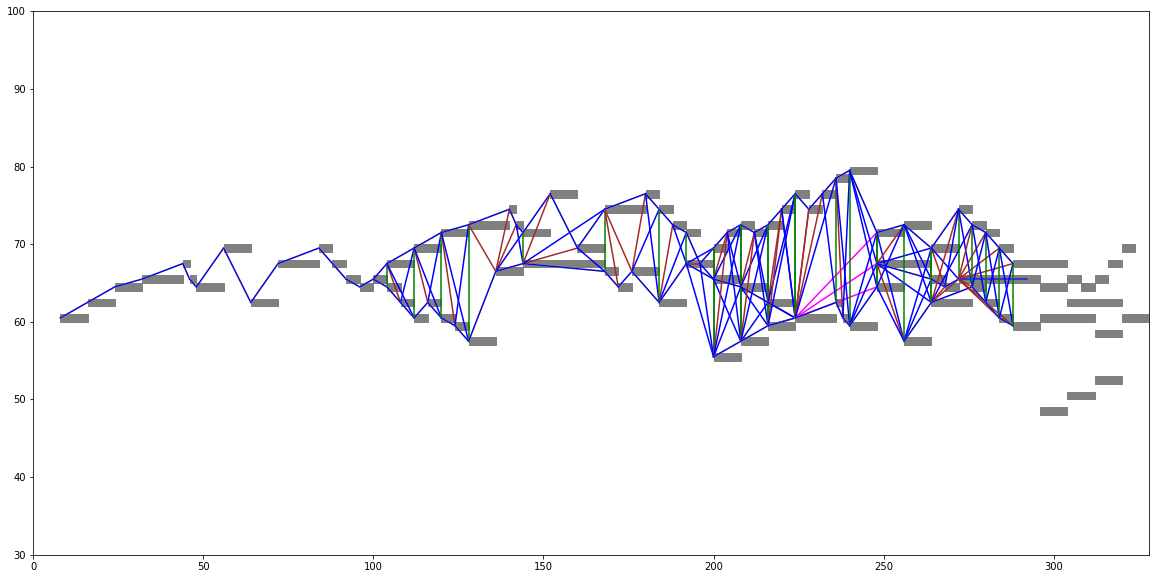

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
for note in score_notes:
    circle=plt.Rectangle( note_to_2d_pos(note), note.note_duration.duration, 1, color='grey')
    ax.add_patch(circle)

for edg in edges[:300]:
    start, end, typ = edg
    # print(start, end, typ)
    x1, y1 = note_to_2d_pos(score_notes[start])
    x2, y2 = note_to_2d_pos(score_notes[end])

    plt.plot([x1, x2],[y1+0.5, y2+0.5], color=edge_to_color[typ])

plt.xlim([0, note.note_duration.xml_position + note.note_duration.duration])
plt.ylim([30,100])

In [11]:
edges[0]

(0, 1, 'voice')